In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import pickle
from sklearn.metrics import *
import pandas as pd
import seaborn as sns
sns.set_theme()
import statsmodels

In [2]:
from all_models import *

In [3]:
# read fit values
fits_single = pickle.load(open('fit_single_CV_640.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_CV_640.pickle', 'rb'))
fits_eight = pickle.load(open('fit_dual_eight_CV_704.pickle', 'rb'))
#fits_six = pickle.load(open('fit_six_CV_704.pickle', 'rb'))
#fits_mixed = pickle.load(open('fit_mixed_CV_704.pickle', 'rb'))
#fits_single_transfer = pickle.load(open('fit_single_CV_transfer.pickle', 'rb'))
#fits_dual_transfer = pickle.load(open('fit_dual_CV_transfer.pickle', 'rb'))

curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))
curvatures_smooth = curvatures_smooth/90.0
curvatures = pickle.load(open('curvatures.pickle', 'rb'))

In [4]:
A = np.mean(fits_single, axis = 0)[:, 0]
B = np.mean(fits_single, axis = 0)[:, 1]
Af = np.mean(fits_dual, axis = 0)[:, 0]
Bf = np.mean(fits_dual, axis = 0)[:, 1]
As = np.mean(fits_dual, axis = 0)[:, 2]
Bs = np.mean(fits_dual, axis = 0)[:, 3]

Af8 = np.mean(fits_eight, axis = 0)[:, 0]
Bf8 = np.mean(fits_eight, axis = 0)[:, 1]
As8 = np.mean(fits_eight, axis = 0)[:, 2]
Bs8 = np.mean(fits_eight, axis = 0)[:, 3]
Aft8 = np.mean(fits_eight, axis = 0)[:, 4]
Bft8 = np.mean(fits_eight, axis = 0)[:, 5]
Ast8 = np.mean(fits_eight, axis = 0)[:, 6]
Bst8 = np.mean(fits_eight, axis = 0)[:, 7]


In [5]:
d = {'Rotation': np.ravel(np.row_stack((np.repeat('Sudden', 30), np.repeat('Gradual', 30)))),
     'Emphasis': np.ravel(np.row_stack((np.repeat('Speed', 15), np.repeat('Accuracy', 15), np.repeat('Speed', 15), np.repeat('Accuracy', 15)))),
     'A': np.concatenate((A[0::4], A[1::4], A[2::4], A[3::4])),
     'B': np.concatenate((B[0::4], B[1::4], B[2::4], B[3::4])),
     'Af': np.concatenate((Af[0::4], Af[1::4], Af[2::4], Af[3::4])),
     'Bf': np.concatenate((Bf[0::4], Bf[1::4], Bf[2::4], Bf[3::4])),
     'As': np.concatenate((As[0::4], As[1::4], As[2::4], As[3::4])),
     'Bs': np.concatenate((Bs[0::4], Bs[1::4], Bs[2::4], Bs[3::4])),

     'Af8': np.concatenate((Af8[0::4], Af8[1::4], Af8[2::4], Af8[3::4])),
     'Bf8': np.concatenate((Bf8[0::4], Bf8[1::4], Bf8[2::4], Bf8[3::4])),
     'As8': np.concatenate((As8[0::4], As8[1::4], As8[2::4], As8[3::4])),
     'Bs8': np.concatenate((Bs8[0::4], Bs8[1::4], Bs8[2::4], Bs8[3::4])),
     'Aft8': np.concatenate((Aft8[0::4], Aft8[1::4], Aft8[2::4], Aft8[3::4])),
     'Bft8': np.concatenate((Bft8[0::4], Bft8[1::4], Bft8[2::4], Bft8[3::4])),
     'Ast8': np.concatenate((Ast8[0::4], Ast8[1::4], Ast8[2::4], Ast8[3::4])),
     'Bst8': np.concatenate((Bst8[0::4], Bst8[1::4], Bst8[2::4], Bst8[3::4])),
     
    }


In [46]:
parameters = pd.DataFrame(d)
melted = pd.melt(parameters, id_vars=['Rotation','Emphasis'], var_name='params', value_name='Mean_Parameter_Values')


(0.0, 1.0)

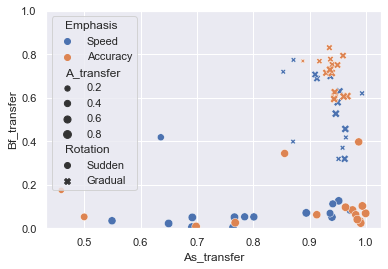

In [26]:
g = sns.scatterplot(x="As_transfer", y="Bf_transfer", hue="Emphasis", style = 'Rotation', data=parameters)
plt.ylim((0, 1))

(0.0, 1.0)

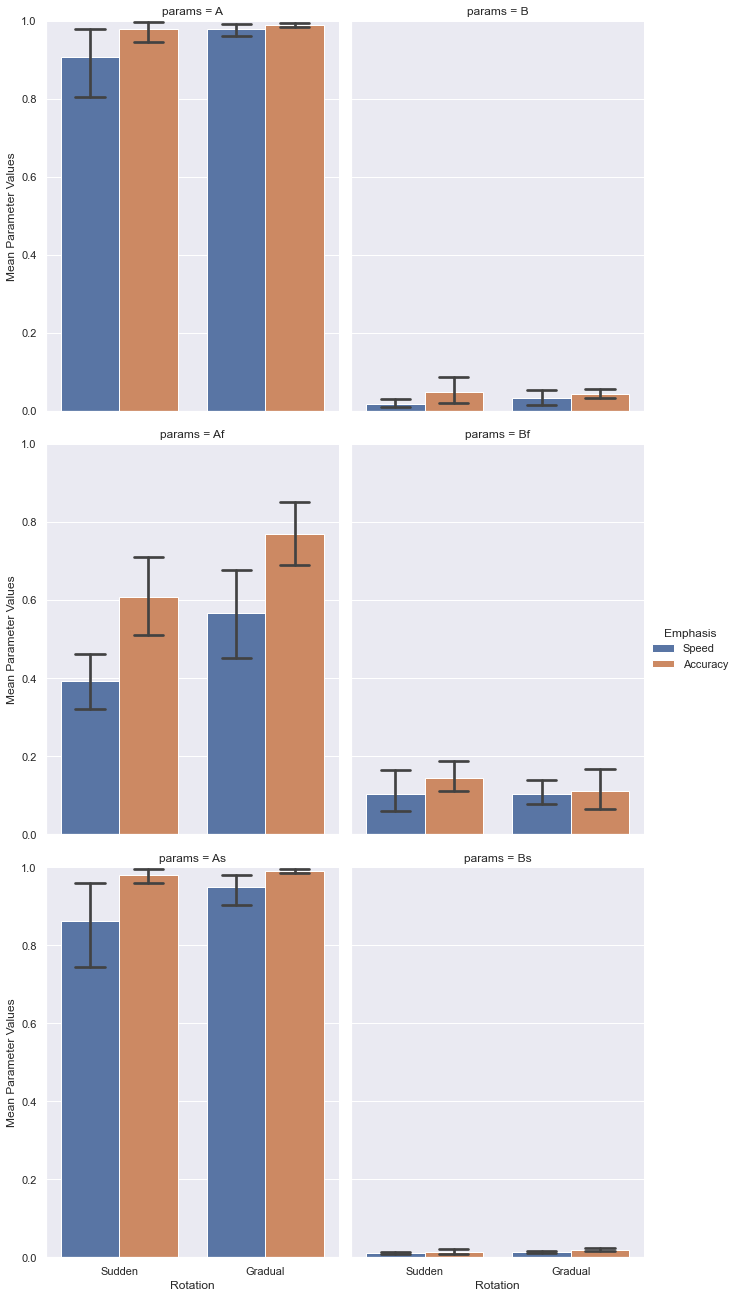

In [27]:
g = sns.catplot(x="Rotation", y="Mean_Parameter_Values", hue="Emphasis", col = 'params',
                col_wrap=2, col_order = ['A', 'B', 
                                         'Af', 'Bf', 
                                        'As', 'Bs',],
                capsize=.2, height=6, aspect=.75,ci = 95,
                kind = 'bar', data=melted)

plt.ylim((0, 1))


(0.0, 1.0)

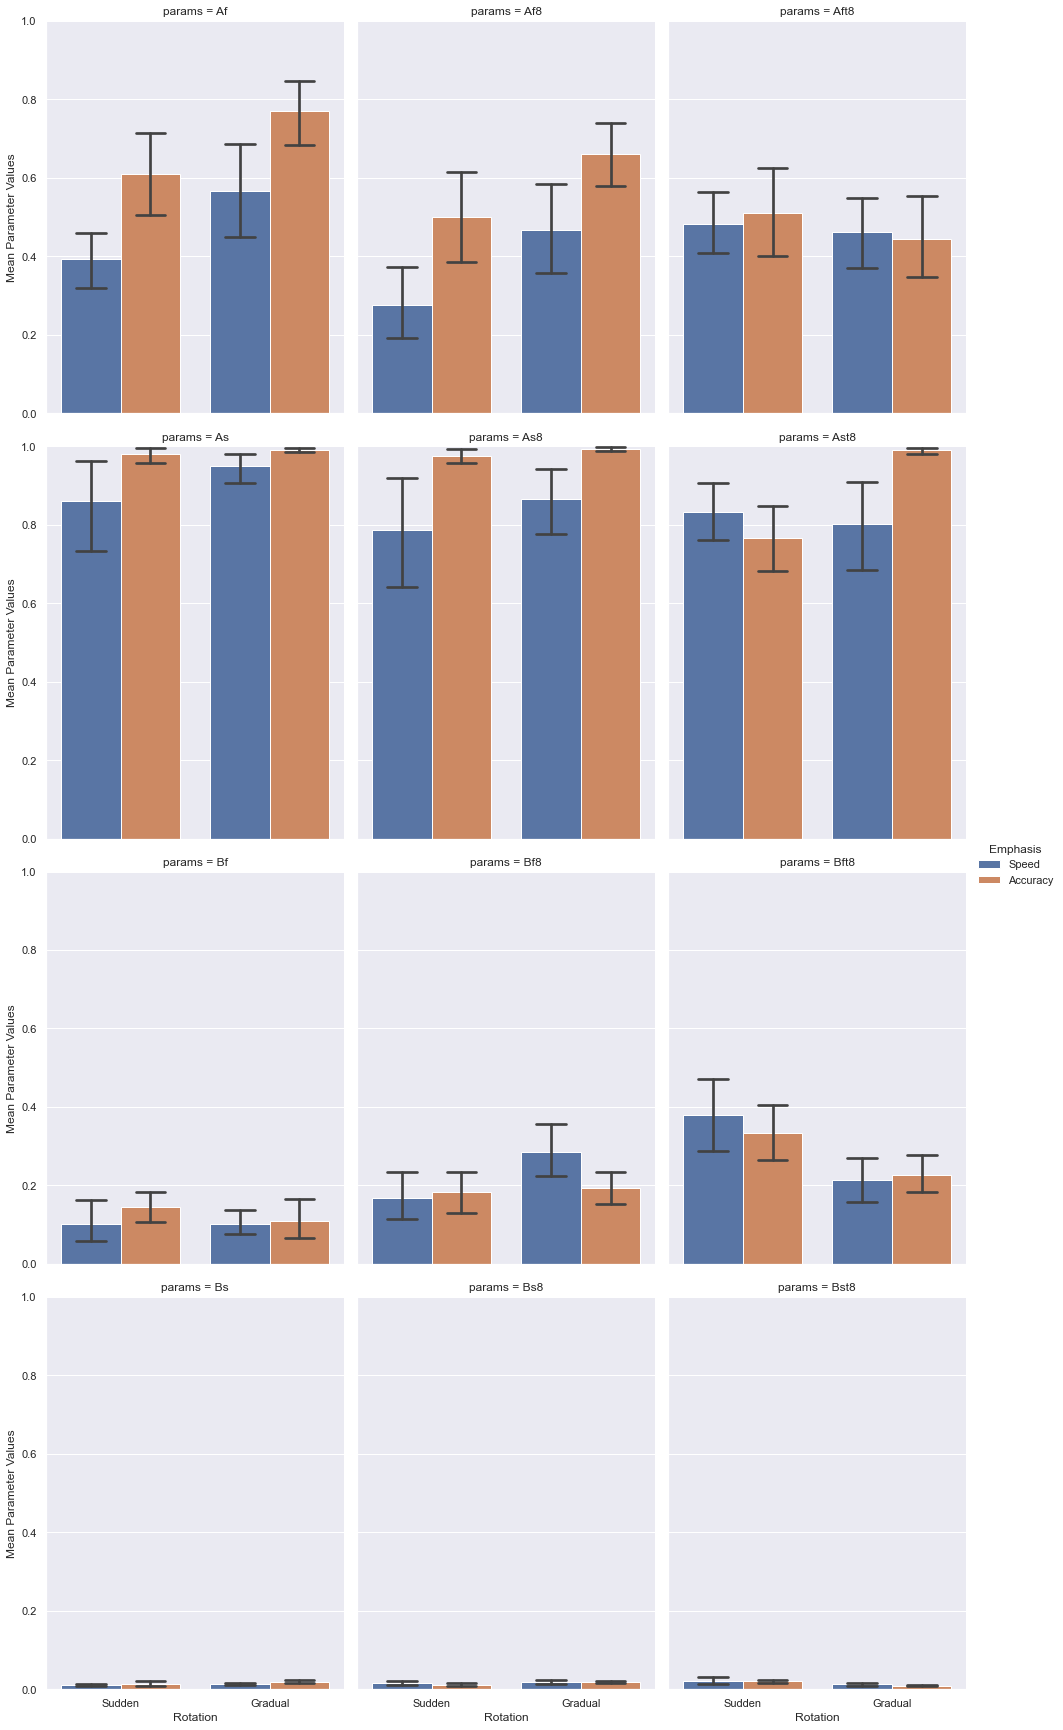

In [9]:
g = sns.catplot(x="Rotation", y="Mean Parameter Values", hue="Emphasis", col = 'params',
                col_wrap=3, col_order = ['Af', 'Af8', 'Aft8', 
                                         'As', 'As8', 'Ast8', 
                                         'Bf', 'Bf8', 'Bft8',
                                         'Bs', 'Bs8', 'Bst8'],
                capsize=.2, height=6, aspect=.75,ci = 95,
                kind = 'bar', data=melted)

plt.ylim((0, 1))

In [48]:
model = smf.ols('Mean_Parameter_Values~Rotation*Emphasis', data=melted[melted['params'] == 'Af']).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

ValueError: endog has evaluated to an array with multiple columns that has shape (60, 60). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [44]:
data

,Rotation,Emphasis,params,Mean Parameter Values
360,Sudden,Speed,Af8,0.0399945
361,Sudden,Speed,Af8,0.231155
362,Sudden,Speed,Af8,0.479851
363,Sudden,Speed,Af8,0.410428
364,Sudden,Speed,Af8,0.278281
365,Sudden,Speed,Af8,0.295497
366,Sudden,Speed,Af8,0.0931347
367,Sudden,Speed,Af8,0.366564
368,Sudden,Speed,Af8,0.25927
369,Sudden,Speed,Af8,0.145741
